In [62]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from  tensorflow import keras
selected_object = ['cable','grid','metal_nut','screw', 'transistor','zipper']
screw_img = []
screw_img_mask = []
import os
for dirname, _, filenames in os.walk('/kaggle/input/mvtec-ad'):
    object_name = dirname.split('/')[-1]
    if object_name in selected_object :
        for dirname, _, filenames in os.walk(f'/kaggle/input/mvtec-ad/{object_name}'):
            for filename in sorted(filenames):
                defect = dirname.split('/')[-1]
                defect_g = dirname.split('/')[-2]
                if object_name == 'screw' and filename.split('.')[-1]=='png' and defect_g=='ground_truth':
                    screw_img_mask.append(f'/kaggle/input/mvtec-ad/{object_name}/ground_truth/{defect}/{filename}')
                if object_name == 'screw' and filename.split('.')[-1]=='png' and defect_g=='test':
                    if defect != 'good':
                        screw_img.append(f'/kaggle/input/mvtec-ad/{object_name}/test/{defect}/{filename}')
screw_img = sorted(screw_img)
screw_img_mask = sorted(screw_img_mask) 

screw_image = []
screw_image_mask = []
# for img_path in screw_img :
#     type_ = img_path.split('/')[-2]
#     if type_=='good':
#         img = tf.io.read_file(img_path)
#         img = tf.image.decode_image(img, channels=3, dtype=tf.uint8)
#         height, width, channels = img.shape
#         img_mask = tf.zeros((height, width,1), dtype=tf.uint8)
#         screw_image_mask.append(img_mask)
for mask_path in screw_img_mask :
        img = tf.io.read_file(mask_path)
        img = tf.image.decode_image(img, channels=3, dtype=tf.uint8)
        screw_image_mask.append(img)
for img_path in screw_img :
        img = tf.io.read_file(img_path)
        img = tf.image.decode_image(img, channels=3, dtype=tf.uint8)
        screw_image.append(img)

In [63]:
print(len(screw_image))
print(len(screw_image_mask))

119
119


In [64]:
test_images = screw_image[80: ]
test_masks = screw_image_mask[80: ]

In [65]:
print(len(test_images))
print(len(test_masks))

39
39


(-0.5, 1023.5, 1023.5, -0.5)

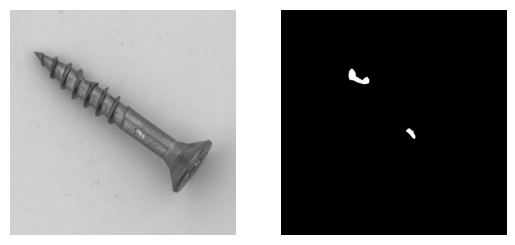

In [66]:
plt.subplot(1,2,1)
plt.imshow(test_images[0])
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(test_masks[0])
plt.axis(False)

In [67]:
images = screw_image[:80]
masks =screw_image_mask[:80]

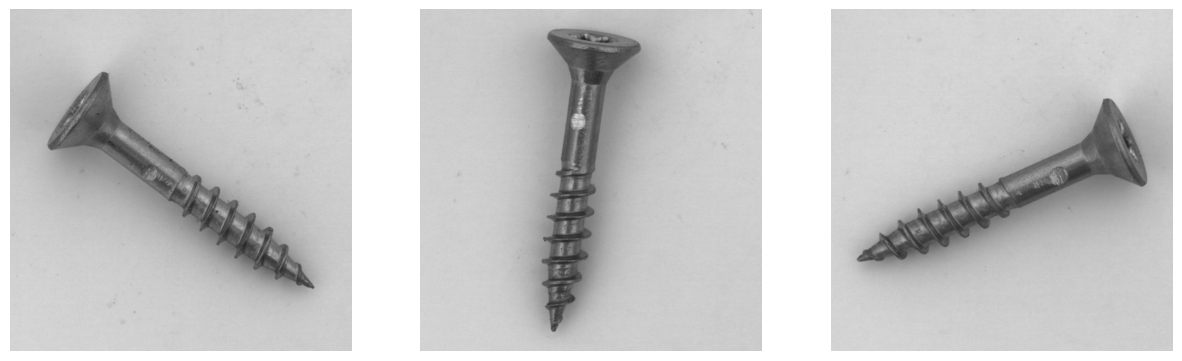

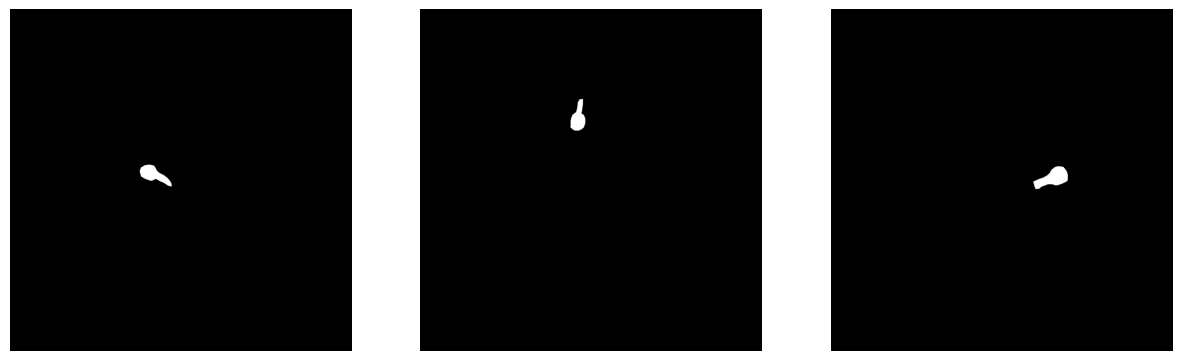

In [68]:
plt.figure(figsize = (15,6))
j=0
for i in range(50,53):
    plt.subplot(1,3,j+1)
    plt.imshow(np.squeeze(images[i]))
    plt.axis(False)
    j=j+1
    
plt.figure(figsize = (15,6))
j=0
for i in range(50,53):
    plt.subplot(1,3,j+1)
    plt.imshow(masks[i])
    plt.axis(False)
    j=j+1

In [69]:
def resize_image(image):
    image = np.squeeze(image)
    image = tf.cast(image, dtype = tf.float32)
    image = image/255.
    image = tf.image.resize(image, (128,128))
    return image

In [70]:
def resize_mask(mask):
    mask = tf.cast(mask, dtype = tf.float32)
    mask = mask/255.
    mask = tf.image.resize(mask, (128,128))
    return mask

In [71]:
X = [resize_image(i) for i in images] 
y = [resize_mask(i) for i in masks] 

In [72]:
len(X), len(y)

(80, 80)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state=0)

print('X_train: ', len(X_train))
print('X_val: ', len(X_val))
print('y_train: ', len(y_train))
print('y_val: ', len(y_val))

X_train:  64
X_val:  16
y_train:  64
y_val:  16


In [75]:
X_train[0]

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.7901961 , 0.7901961 , 0.7901961 ],
        [0.7754902 , 0.7754902 , 0.7754902 ],
        [0.7794118 , 0.7794118 , 0.7794118 ],
        ...,
        [0.8068627 , 0.8068627 , 0.8068627 ],
        [0.80490196, 0.80490196, 0.80490196],
        [0.8068628 , 0.8068628 , 0.8068628 ]],

       [[0.78039217, 0.78039217, 0.78039217],
        [0.78431374, 0.78431374, 0.78431374],
        [0.7892157 , 0.7892157 , 0.7892157 ],
        ...,
        [0.80784315, 0.80784315, 0.80784315],
        [0.7901961 , 0.7901961 , 0.7901961 ],
        [0.7823529 , 0.7823529 , 0.7823529 ]],

       [[0.7941177 , 0.7941177 , 0.7941177 ],
        [0.7764706 , 0.7764706 , 0.7764706 ],
        [0.7911765 , 0.7911765 , 0.7911765 ],
        ...,
        [0.8068627 , 0.8068627 , 0.8068627 ],
        [0.8009804 , 0.8009804 , 0.8009804 ],
        [0.8147059 , 0.8147059 , 0.8147059 ]],

       ...,

       [[0.8156863 , 0.8156863 , 0.8156863 ],
        [0.81

In [76]:
y_train[0]

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [77]:
X_train = tf.data.Dataset.from_tensor_slices(X_train)
X_val = tf.data.Dataset.from_tensor_slices(X_val)
y_train = tf.data.Dataset.from_tensor_slices(y_train)
y_val = tf.data.Dataset.from_tensor_slices(y_val)

In [78]:
X_train.element_spec, X_val.element_spec, y_train.element_spec, y_val.element_spec

(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None))

In [79]:
train = tf.data.Dataset.zip(X_train, y_train)
val = tf.data.Dataset.zip(X_val, y_val)

In [80]:
type(train)

tensorflow.python.data.ops.zip_op._ZipDataset

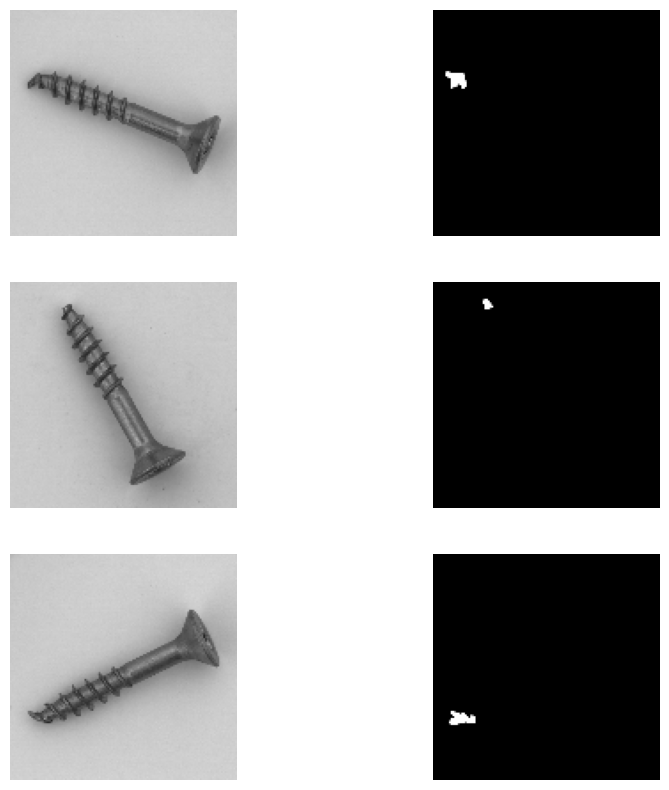

In [81]:
i = 0
plt.figure(figsize=(10,10))
for img, mask in train.take(3):
    plt.subplot(3,2,i+1)
    plt.imshow(img)
    i+=1
    plt.axis(False)
    
    plt.subplot(3,2,i+1)
    plt.imshow(mask)
    i+=1
    plt.axis(False)

In [82]:
size = tf.data.experimental.cardinality(train)
size.numpy()

64

In [83]:
sample = list(train.as_numpy_iterator())
img = []
msk = []
for i,j in sample:
    img.append(i)
    msk.append(j)

In [84]:
img = np.array(img)

In [85]:
img.shape

(64, 128, 128, 3)

In [86]:
len(img)


64

In [87]:
msk = np.array(msk)

In [88]:
msk.shape

(64, 128, 128, 3)

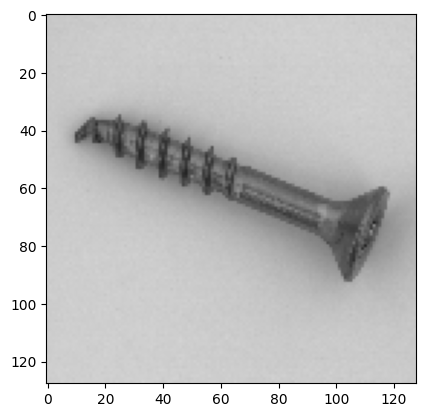

In [89]:
plt.imshow(img[0])

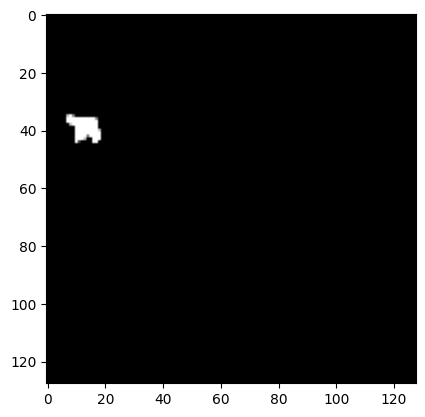

In [90]:
plt.imshow(msk[0])

In [91]:
sample = list(val.as_numpy_iterator())
val_img = []
val_msk = []
for i,j in sample:
    val_img.append(i)
    val_msk.append(j)

In [92]:
val_img = np.array(val_img)
val_img.shape

(16, 128, 128, 3)

In [93]:
val_msk = np.array(val_msk)
val_msk.shape

(16, 128, 128, 3)

In [94]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input,UpSampling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras import backend as keras

In [95]:
def unet(input_size=(128, 128, 3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    conv9 = Conv2D(3, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)  # 3 channels
    conv10 = Conv2D(3, 1, activation='sigmoid')(conv9)  # Output in 3 channels

    model = Model(inputs, conv10)

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [96]:
model = unet()  

In [97]:
len(X_train)

64

In [98]:
len(X_val)

16

In [ ]:
model.fit(img,
          msk,
          batch_size = 16,
          epochs=15,
          validation_data=(val_img,val_msk)) 

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 65s 15s/step - accuracy: 0.5572 - loss: 0.7045 - val_accuracy: 0.9935 - val_loss: 0.6931
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 14s/step - accuracy: 0.9927 - loss: 0.6931 - val_accuracy: 0.9926 - val_loss: 0.6928
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 57s 14s/step - accuracy: 0.9961 - loss: 0.6927 - val_accuracy: 0.9998 - val_loss: 0.6926
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 57s 14s/step - accuracy: 0.9998 - loss: 0.6925 - val_accuracy: 0.9999 - val_loss: 0.6924
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.9999 - loss: 0.6923 

In [ ]:
train_loss ,train_acc = model.evaluate(img,msk)
val_loss ,val_acc = model.evaluate(val_img,val_msk)
print("Training loss = %.2f" % train_loss)
print("Training accuracy = %.2f "% train_acc)

print("Validation loss = %.2f "%val_loss)
print("Validation accuracy = %.2f "% val_acc)

In [ ]:
test_img = [resize_image(i) for i in test_images]
test_img = np.array(test_img)
test_img.shape

In [ ]:
test_msk = [resize_mask(i) for i in test_masks]
test_msk = np.array(test_msk)
test_msk.shape

In [ ]:
y_pred = model.predict(test_img)

In [ ]:
y_pred.shape

In [ ]:
for i in range(5):

    plt.figure(figsize=(15,15))
    
    plt.subplot(i+1,3,1)
    plt.title("Original Image")
    plt.imshow(test_img[i])
    plt.axis(False)
    
    plt.subplot(i+1,3,2)
    plt.title("Ground Truth")
    plt.imshow(test_msk[i])
    plt.axis(False)
    
    plt.subplot(i+1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(tf.round(y_pred[i]))
    plt.axis(False)